In [52]:

import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import caffe
from skimage.metrics import (
    peak_signal_noise_ratio as psnr,
    structural_similarity as ssim,
)
from PIL import Image

In [59]:
brain_idx=4 # options: 1, 2, 3, 4
# To visualize images:
# Image 1: np.rot90(k=1)
# Image 2: np.rot90(k=-1)
# Image 3: np.rot90(k=-1)
# Image 4: np.rot90(k=-1)

In [60]:
mat = scipy.io.loadmat(f"/mnt/data_drive/hrodrigo/mri_rician_noise/.riciannet/RicianNet/testdata/Brain{brain_idx}.mat")
noiseSigma = 15
# mat['Img'] returns the same brain!
brain_not_normalized = mat["Img"]
brain = brain_not_normalized / np.abs(brain_not_normalized).max()
# Add Rician noise
level = noiseSigma * np.abs(brain).max() / 100
n1 = level * np.random.randn(*np.abs(brain).shape) + brain.real
n2 = level * np.random.randn(*np.abs(brain).shape) + brain.imag

brain_real = np.abs(brain)

in_img = np.sqrt(n1**2 + n2**2)

(array([2.133e+03, 5.895e+03, 8.333e+03, 9.279e+03, 8.816e+03, 7.673e+03,
        6.319e+03, 4.787e+03, 3.579e+03, 2.581e+03, 1.853e+03, 1.384e+03,
        9.390e+02, 7.260e+02, 4.780e+02, 2.980e+02, 2.080e+02, 1.110e+02,
        6.900e+01, 3.700e+01, 1.700e+01, 9.000e+00, 3.000e+00, 7.000e+00,
        0.000e+00, 2.000e+00]),
 array([0.00126525, 0.04814783, 0.09503041, 0.14191298, 0.18879556,
        0.23567813, 0.28256071, 0.32944329, 0.37632586, 0.42320844,
        0.47009102, 0.51697359, 0.56385617, 0.61073875, 0.65762132,
        0.7045039 , 0.75138648, 0.79826905, 0.84515163, 0.8920342 ,
        0.93891678, 0.98579936, 1.03268193, 1.07956451, 1.12644709,
        1.17332966, 1.22021224]),
 <BarContainer object of 26 artists>)

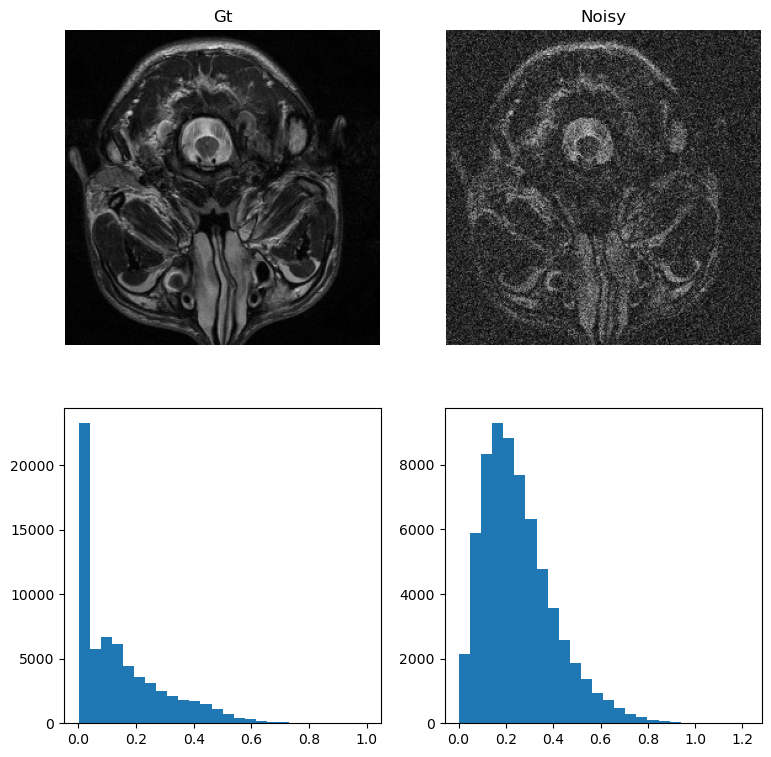

In [61]:
plt.figure(figsize=(9,9))
plt.subplot(2,2,1)
plt.imshow(np.rot90(brain_real[:256,:256], k=-1 if brain_idx != 1 else 1), cmap="gray")
plt.title('Gt')
plt.axis(False)
plt.subplot(2,2,2)
plt.imshow(np.rot90(in_img[:256,:256], k=-1 if brain_idx != 1 else 1), cmap='gray')
plt.title('Noisy')
plt.axis(False)
plt.subplot(2,2,3)
plt.hist(brain_real[:256,:256].flatten(),bins=26)
plt.subplot(2,2,4)
plt.hist(in_img[:256,:256].flatten(),bins=26)

In [62]:
prototext_path = "/mnt/data_drive/hrodrigo/mri_rician_noise/.riciannet/RicianNet/Riciannet_deploy.prototxt"
weights_path = "/mnt/data_drive/hrodrigo/mri_rician_noise/.riciannet/RicianNet/model/N15_complex_Brain1&2.caffemodel"


caffe.set_mode_cpu()  # Use caffe.set_mode_gpu() if you want to use GPU



In [63]:
net = caffe.Net(prototext_path, weights_path, caffe.TEST)

W0129 11:18:23.180588 45221 _caffe.cpp:139] DEPRECATION WARNING - deprecated use of Python interface
W0129 11:18:23.180621 45221 _caffe.cpp:140] Use this instead (with the named "weights" parameter):
W0129 11:18:23.180629 45221 _caffe.cpp:142] Net('/mnt/data_drive/hrodrigo/mri_rician_noise/.riciannet/RicianNet/Riciannet_deploy.prototxt', 1, weights='/mnt/data_drive/hrodrigo/mri_rician_noise/.riciannet/RicianNet/model/N15_complex_Brain1&2.caffemodel')
I0129 11:18:23.181951 45221 upgrade_proto.cpp:67] Attempting to upgrade input file specified using deprecated input fields: /mnt/data_drive/hrodrigo/mri_rician_noise/.riciannet/RicianNet/Riciannet_deploy.prototxt
I0129 11:18:23.181980 45221 upgrade_proto.cpp:70] Successfully upgraded file specified using deprecated input fields.
W0129 11:18:23.181988 45221 upgrade_proto.cpp:72] Note that future Caffe releases will only support input layers and not input fields.
I0129 11:18:23.181996 45221 upgrade_proto.cpp:77] Attempting to upgrade batch n

11:18:23.182634 45221 net.cpp:380] input -> data
I0129 11:18:23.182662 45221 net.cpp:122] Setting up input
I0129 11:18:23.182669 45221 net.cpp:129] Top shape: 1 1 256 270 (69120)
I0129 11:18:23.182680 45221 net.cpp:137] Memory required for data: 276480
I0129 11:18:23.182688 45221 layer_factory.hpp:77] Creating layer data_input_0_split
I0129 11:18:23.182700 45221 net.cpp:84] Creating Layer data_input_0_split
I0129 11:18:23.182708 45221 net.cpp:406] data_input_0_split <- data
I0129 11:18:23.182719 45221 net.cpp:380] data_input_0_split -> data_input_0_split_0
I0129 11:18:23.182731 45221 net.cpp:380] data_input_0_split -> data_input_0_split_1
I0129 11:18:23.182745 45221 net.cpp:122] Setting up data_input_0_split
I0129 11:18:23.182752 45221 net.cpp:129] Top shape: 1 1 256 270 (69120)
I0129 11:18:23.182762 45221 net.cpp:129] Top shape: 1 1 256 270 (69120)
I0129 11:18:23.182771 45221 net.cpp:137] Memory required for data: 829440
I0129 11:18:23.182778 45221 layer_factory.hpp:77] Creating layer

In [64]:
result = net.forward(data=np.rot90(in_img, k=-1 if brain_idx != 1 else 1)[None, None, ...])
result_conv13 = result["conv13"].squeeze().clip(0., 1.)

In [65]:
mask_path=f'/mnt/data_drive/hrodrigo/mri_rician_noise/deep-image-prior/.brainweb_test_data/im_{9+brain_idx}/mask.png'

mask = np.array(Image.open(mask_path).convert("L")) / 255
print(mask.min(),mask.max())



0.0 1.0


(-0.5, 255.5, 255.5, -0.5)

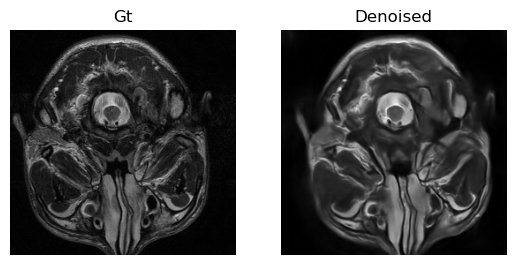

In [66]:
plt.subplot(1,2,1)
plt.title('Gt')
plt.imshow(np.rot90(brain_real[:256,:256], k=-1 if brain_idx != 1 else 1), cmap="gray")
plt.axis(False)
plt.subplot(1,2,2)
plt.title('Denoised')
plt.imshow(result_conv13[:256,:256], cmap="gray")
plt.axis(False)


In [67]:
def psnr_with_mask(
    img_1: np.ndarray,
    img_2: np.ndarray,
    mask: np.ndarray,
    data_range=1.0,
):
    mask_size = (mask > 0).sum().item()
    mse = ((img_1 - img_2) ** 2 * mask).sum() / mask_size
    return 10 * np.log10(data_range**2 / mse)

In [68]:
maskless_psnr = psnr(
        result_conv13[:256, :256],
        np.rot90(brain_real,k=-1 if brain_idx != 1 else 1)[:256, :256],
        data_range=1.0,
    )
mask_psnr = psnr_with_mask(
        np.rot90(brain_real, k=-1 if brain_idx != 1 else 1)[:256, :256],
        result_conv13[:256, :256],
        mask
    )

print('--- PSNR values ---')
print(f'with mask: {mask_psnr}')
print(f'without mask: {maskless_psnr}')


--- PSNR values ---
with mask: 24.51924623910844
without mask: 26.19418136314462


SSIM (without mask, but with padding)

SSIM value is 0.6881422008056658


(-0.5, 269.5, 255.5, -0.5)

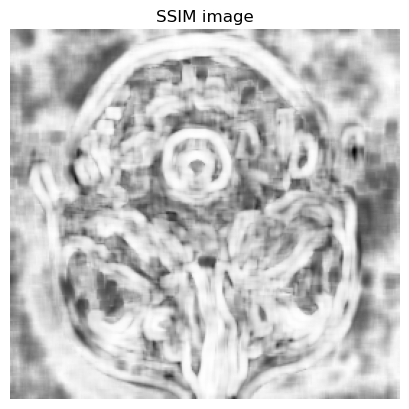

In [69]:
idx, img = ssim(np.rot90(brain_real, k=-1 if brain_idx != 1 else 1),result_conv13, data_range=brain_real.max()-brain_real.min(), full=True)
print(f'SSIM value is {idx}')
plt.imshow(img, cmap='gray')
plt.title('SSIM image')
plt.axis(False)

SSIM (without mask, but without padding)

SSIM value is 0.23055570143092313


(-0.5, 255.5, 255.5, -0.5)

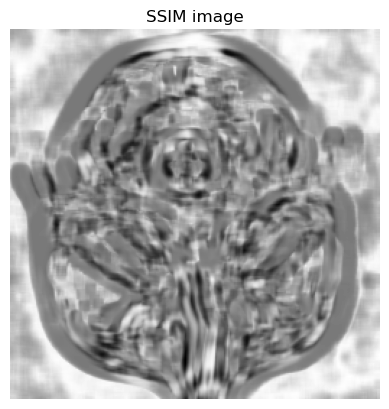

In [70]:
idx, img = ssim(np.rot90(brain_real[:256,:256], k=-1 if brain_idx != 1 else 1),result_conv13[:256,:256], data_range=brain_real.max()-brain_real.min(), full=True)
print(f'SSIM value is {idx}')
plt.imshow(img, cmap='gray')
plt.title('SSIM image')
plt.axis(False)

# Results report

Im1 - PSNR (with mask, -less): 26.44 dB, **26.70** dB

Im2 - PSNR (with mask, -less): 26.97 dB, **27.97** dB

Im3 - PSNR (with mask, -less): 26.69 dB, **27.25** dB

Im4 - PSNR (with mask, -less): 24.58 dB, **26.22** dB